In [8]:
#imports
from qiskit import*
from qiskit.tools.visualization import plot_bloch_multivector
import numpy as np
from numpy import linalg as LA
import random
from qiskit.extensions.simulator import snapshot
from matplotlib import pyplot as plt

In [9]:
#initialize state vector

def normalize(vector):
    return vector / LA.norm(vector)

def initialize( vector ):
    circuit.initialize(vector.tolist(),0)
    for i in range(1,5):
            circuit.initialize([1,0],i)


In [10]:
#encode
def encode():
    for i in range(5):
        circuit.h(i)
    circuit.cx(0,1)
    circuit.cx(0,2)


In [11]:
#error
def error(error_prob):
    for i in range(3):
        if( abs(random.random()) < error_prob ):
            circuit.z(i)

In [12]:
#correction
def correct():
    circuit.cx(0,3)
    circuit.cx(1,3)

    circuit.cx(1,4)
    circuit.cx(2,4)
    
    syndrome = [circuit.measure(3,0),circuit.measure(4,1)]
    
    if(syndrome == [1,0]):
        circuit.z(0)
    elif(syndrome == [0,1]):
        circuit.z(2)
    elif(syndrome == [1,1]):
        circuit.z(1)    
    
    circuit.cx(1,2)
    circuit.measure(2,0)
    circuit.cx(0,1)
    circuit.measure(1,0)
    circuit.h(0)
    circuit.snapshot("one_qubit", qubits=[0])

[0.22537428701932613, 0.21956844546321633, 0.21738511769736174, 0.21945934008540974, 0.22189835872993258, 0.2177408550391589, 0.2179554246673739, 0.22120921167813432, 0.21504767620690174, 0.22113249507317176, 0.22556865322143518, 0.2234158176614677, 0.21507037811628496, 0.2192425978445736, 0.220602934266914, 0.21889414920570008, 0.21242725246862804, 0.21981826381009, 0.21813049940428164, 0.2126458884674774, 0.2141655961849589, 0.21808054659114076, 0.21376743751708815, 0.21563059734302584, 0.2255632690457152, 0.22341396300885855, 0.21406629141770367, 0.22079429269068843, 0.209465586944633, 0.2145781186244177]


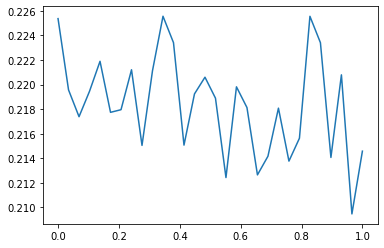

In [13]:

def run(circuit,error_prob):
        initial_state = [complex(random.random(),random.random()),complex(random.random(),random.random())]
        initial_state = normalize(initial_state)
        initialize(initial_state)
        encode()
        error(error_prob)
        correct()
        return initial_state

    
p = np.linspace(0,1,30)
fidelity_array = []
for k in p:
    fidelity = 0
    shots = 50
    circuit = QuantumCircuit(5,2,name="repitition_circ")
    for j in range(shots):
        circuit = QuantumCircuit(5,2,name="repitition_circ")
        initial_state = run(circuit,k)
        simulator = Aer.get_backend('statevector_simulator')
        job = execute(circuit,backend = simulator)
        result = job.result()
        snapshots = result.data()['snapshots']['statevector'].values()
        s = []
        for v in snapshots:
            for i in range(2):
                s.append(complex(v[0][i][0],v[0][i][1]))
        s = np.array(s)
        dot = abs(np.dot(initial_state,s))
        fidelity += dot
    fidelity = fidelity/shots
    fidelity_array.append(fidelity)
    
print(fidelity_array)
%matplotlib inline
plt.plot(p,np.array(fidelity_array))
